1.1 Data Loading and Preprocessing

In [1]:
import tensorflow as tf
import os

In [2]:
import cv2 # lib used for RWE for images
from PIL import Image # used instead of imghdr
from matplotlib import pyplot as plt

In [3]:
# PIL
img = Image.open("../../train/happy/happy1.jpg")
print(img.format)

JPEG


In [4]:
data_dir = '../../train'
os.listdir(os.path.join(data_dir, 'happy'))

['happy1.jpg',
 'happy10.png',
 'happy11.jpeg',
 'happy12.jpg',
 'happy14.jpeg',
 'happy15.jpeg',
 'happy16.png',
 'happy17.jpg',
 'happy18.jpg',
 'happy19.jpg',
 'happy2.jpg',
 'happy20.jpg',
 'happy21.jpg',
 'happy22.jpg',
 'happy23.jpg',
 'happy24.jpg',
 'happy25.jpg',
 'happy26.jpg',
 'happy27.jpg',
 'happy28.png',
 'happy29.jpg',
 'happy3.jpg',
 'happy30.jpg',
 'happy31.jpg',
 'happy32.png',
 'happy33.png',
 'happy34.jpg',
 'happy35.jpg',
 'happy36.jpg',
 'happy37.jpg',
 'happy38.jpg',
 'happy39.jpg',
 'happy4.jpg',
 'happy40.jpg',
 'happy41.jpg',
 'happy42.jpg',
 'happy43.jpg',
 'happy44.jpg',
 'happy45.jpg',
 'happy46.jpg',
 'happy47.jpg',
 'happy48.jpg',
 'happy49.jpg',
 'happy5.jpg',
 'happy50.jpg',
 'happy51.jpg',
 'happy52.jpg',
 'happy53.jpg',
 'happy54.jpg',
 'happy55.jpg',
 'happy56.jpg',
 'happy57.jpg',
 'happy58.jpeg',
 'happy59.jpg',
 'happy6.png',
 'happy60.jpg',
 'happy61.jpg',
 'happy62.jpg',
 'happy63.jpg',
 'happy64.jpg',
 'happy65.jpg',
 'happy66.jpg',
 'happy67.

1.2 Remove Fucked Images

In [5]:
img_exts = ["JPEG", "PNG", "JPG"]
 # used to test if a file is image or not # array

In [6]:
variable = cv2.imread(os.path.join(data_dir, 'happy', 'happy1.jpg'))

In [7]:
variable.shape
#(height, width, channels (3 -> RBG, 4-> RGBA (alpha), 1->GreyScale) )

(880, 1400, 3)

In [8]:
# plt.imshow(variable)
# plt.imshow(cv2.cvtColor(variable, cv2.COLOR_BGR2RGB))

In [9]:
for image_class in os.listdir(data_dir): # happy, sad
    for image in os.listdir(os.path.join(data_dir, image_class)): #individual image
        image_path = os.path.join(data_dir, image_class, image) #individual image path
        # print(image_path)
        try:
            img = cv2.imread(image_path)
            tip = Image.open(image_path).format
            if tip not in img_exts:
                print(f"File not in format : {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"File error : {image_path}")
            # os.remove(image_path)

1.3 Load Dataset

In [10]:
import numpy as np

In [11]:
data = tf.keras.utils.image_dataset_from_directory('../../train') # reshapes all the images to 3 * 256 * 256 and 32-batch size and converts the files to tensors (tensors is a datastructure which can store multiple dimensional data)

Found 161 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

In [14]:
len(batch) # 2 - Images, Labels
batch[0].shape # 0 is images, 1 is labels

(32, 256, 256, 3)

In [15]:
batch[1] # 0 is happy, 1 is sad

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int32)

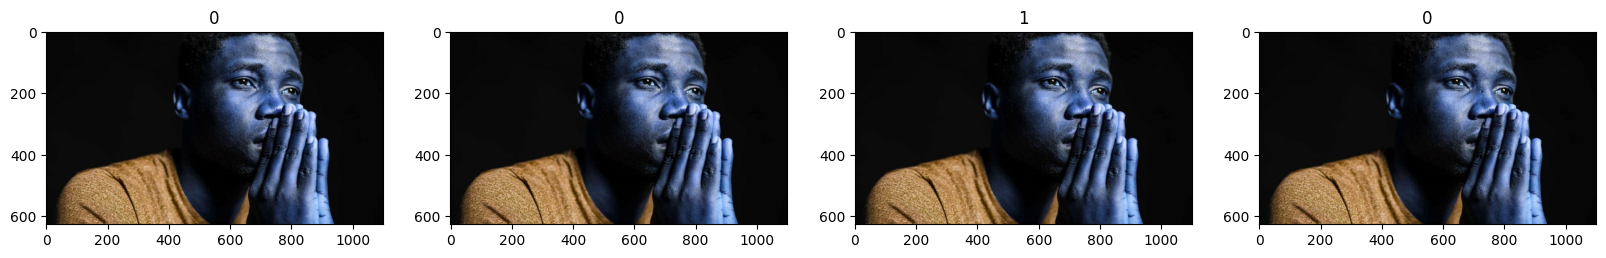

In [16]:
fig, ax = plt.subplots(ncols=4, figsize =(20, 20))
for idx, im in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

2. Preprocessing

2.1 Scale Data

In [17]:
batch[0].max() # RGB colors

np.float32(255.0)

In [18]:
scaled = batch[0] / 255  # reducing the RGB colors to 0-1
scaled.max()

np.float32(1.0)

In [19]:
data = data.map(lambda x, y: (x/255, y))

In [20]:
data.as_numpy_iterator().next()[0]

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

2.2 Split data

In [21]:
len(data)

6

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [23]:
# data.take(len) # takes len batch
# data.skip(len) # skips len batch 

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

3. Modelling

3.1 Build Deep Learning Model

In [25]:
from tensorflow.keras.models import Sequential  # linear stack of layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
# Conv2D - Convolutional layers model, with convolutional filters
# MaxPooling2D - reduces the dimensions (H, W) while maintaining important features
# Dense - just a layer with fully connected neurons (feature extraction)
# Flatten - converts 2D output to 1D
# Dropout - Drops some neurons which have least to none impact

In [27]:
model = Sequential()

In [28]:
variable.shape

(880, 1400, 3)

In [29]:
# Input Layer
model.add(Conv2D(16, (3,3), strides=1, activation='relu', input_shape=(256, 256, 3)))  # 16 is the input neurons # change in this changes the accuracy of model
model.add(MaxPooling2D())

# 1st hidden layer
model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

# 2nd hidden layer
model.add(Conv2D(16, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

# Converts all the matrices to a single output layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(256, activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))  # Converts the output to either 0 or 1 (based on activation function)


e:\Projects\Deep Learning\firstProject\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy', 'precision', ])  # optimizer, loss function, performance metrics
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
logdir = 'logs'

In [ ]:
tensroflow_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) # checkpoint for rememebering a model

In [35]:
hist = model.fit(train, epochs = 20, validation_data=val, callbacks=[tensroflow_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 420ms/step - accuracy: 0.5948 - loss: 0.6855 - val_accuracy: 0.6250 - val_loss: 0.8248
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 374ms/step - accuracy: 0.6198 - loss: 0.7030 - val_accuracy: 0.7812 - val_loss: 0.6078
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 382ms/step - accuracy: 0.6427 - loss: 0.6260 - val_accuracy: 0.7500 - val_loss: 0.4645
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 423ms/step - accuracy: 0.7385 - loss: 0.5003 - val_accuracy: 0.6875 - val_loss: 0.4868
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 411ms/step - accuracy: 0.8365 - loss: 0.4426 - val_accuracy: 0.8125 - val_loss: 0.3684
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 380ms/step - accuracy: 0.8698 - loss: 0.3259 - val_accuracy: 1.0000 - val_loss: 0.2010
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 440ms/step - accuracy: 0.9344 - loss: 0.2160 - val_accuracy: 1.0000 - val_loss: 0.1357
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 348ms/step - accuracy: 0.9635 - loss: 0.1924 - val_accuracy: 1.0000 - val_loss:

In [36]:
hist.history

{'accuracy': [0.6015625,
  0.6328125,
  0.671875,
  0.7734375,
  0.828125,
  0.875,
  0.953125,
  0.9453125,
  0.9765625,
  0.96875,
  0.9921875,
  0.984375,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.7033531665802002,
  0.6698611974716187,
  0.5975285172462463,
  0.48805534839630127,
  0.4234607219696045,
  0.3150664269924164,
  0.19772595167160034,
  0.2006830871105194,
  0.12325403094291687,
  0.09154756367206573,
  0.049079786986112595,
  0.047927942126989365,
  0.02320830151438713,
  0.012776939198374748,
  0.008978922851383686,
  0.006287858355790377,
  0.0031313986983150244,
  0.0027117282152175903,
  0.0015804251888766885,
  0.0011420880910009146],
 'val_accuracy': [0.625,
  0.78125,
  0.75,
  0.6875,
  0.8125,
  1.0,
  1.0,
  1.0,
  0.96875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.8248307704925537,
  0.6078262329101562,
  0.4645024538040161,
  0.48681533336639404,
  0.3684311509132385,
  0.20097942

Text(0.5, 0.98, 'loss')

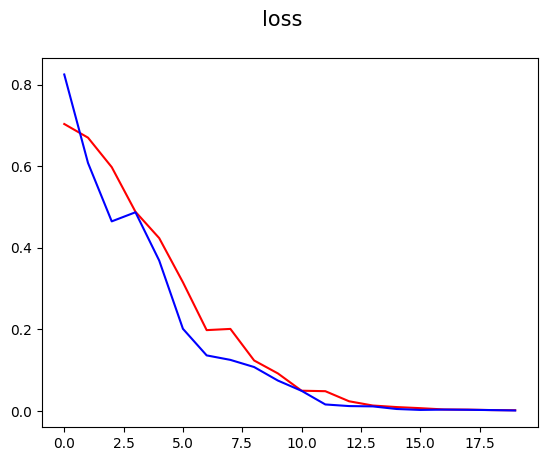

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('loss', fontsize=15)
# plt.legend(loc='upper left')
# plt.show()

Text(0.5, 0.98, 'accuracy')

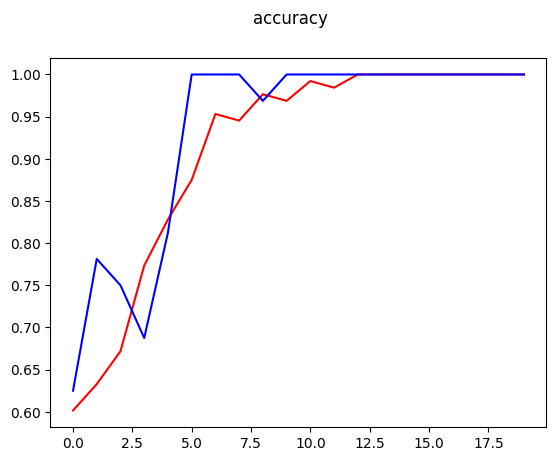

In [48]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'red', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'blue', label = 'val_accuracy')
fig.suptitle('accuracy')

4. Test

In [50]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [51]:
pre = Precision()
recall = Recall()
ba = BinaryAccuracy()

In [52]:
for bbb in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    recall.update_state(y, yhat)
    ba.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


In [54]:
print(f'Pre = {pre.result().numpy()}, Recall = {recall.result().numpy()}, BinaryAccuracy = {ba.result().numpy()}')

Pre = 1.0, Recall = 0.75, BinaryAccuracy = 0.875


4.2 Test other batch

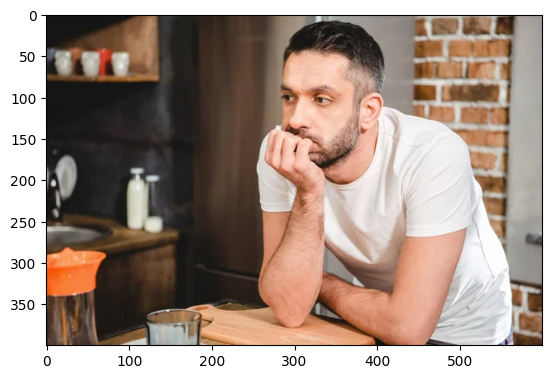

In [60]:
img = cv2.imread('../../test/sad/sad1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

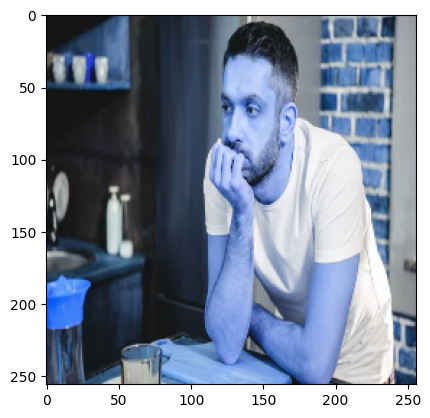

In [65]:
resize = tf.image.resize(img, (256, 256))
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [66]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [67]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [68]:
yhat

array([[0.9996937]], dtype=float32)

In [69]:
if yhat < 0.5 : 
    print('happy')
else :
    print('sad')

sad
